In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df_movies=pd.read_csv('tmdb_movies.csv')
df_movies.head(1)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,2009-12-10,2787965087,162.00,Released,Enter the World of Pandora.,Avatar,7.20,11800,28.00


In [6]:
df_genres=pd.read_csv('tmdb_genres.csv')
df_genres.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [11]:
qnt=df_movies['vote_count'].quantile(0.75)
qnt

737.0

In [22]:
df_movies_sorted=df_movies[df_movies['vote_count']>qnt]
top10=df_movies_sorted.sort_values(by='vote_average', ascending=False).head(10)
list(top10['original_title'])

['The Shawshank Redemption',
 'The Godfather',
 '千と千尋の神隠し',
 'Whiplash',
 'The Godfather: Part II',
 'Pulp Fiction',
 "Schindler's List",
 'Fight Club',
 'Psycho',
 'GoodFellas']

In [36]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_by_year=df_movies[(df_movies['release_date'].dt.year >=2010)&(df_movies['release_date'].dt.year <=2016)]

In [47]:
df_by_year=df_by_year[['original_title','budget','revenue','release_date']]
df_by_year['release_date']=df_by_year['release_date'].dt.year
final_df_by_year=df_by_year.rename(columns={'release_date':'release_year'})

In [83]:
df_for_plot=final_df_by_year.groupby('release_year')[['budget','revenue']].mean().round(2)
pd.set_option('display.float_format', '{:,.2f}'.format)
df_for_plot

,budget,revenue
release_year,,
2010,"34,495,410.94","90,438,110.08"
2011,"34,772,320.34","92,004,130.76"
2012,"34,922,031.99","116,065,914.64"
2013,"35,523,293.65","101,348,455.82"
2014,"30,959,887.86","101,346,599.11"
2015,"31,132,163.74","105,439,926.95"
2016,"45,703,269.23","139,049,586.04"


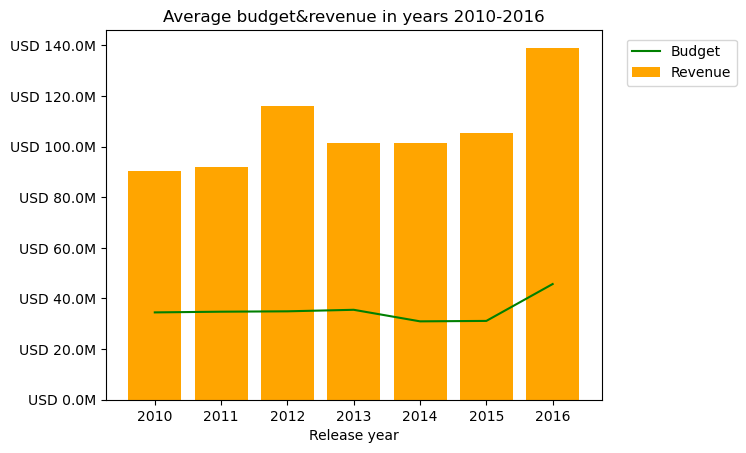

In [127]:
def million(x, pos):
        return 'USD {:2.1f}M'.format(x*1e-6)
plt.bar(df_for_plot.index, df_for_plot['revenue'],color='orange', label='Revenue')
plt.plot(df_for_plot.index, df_for_plot['budget'],color='green', label='Budget')
plt.xlabel('Release year')
plt.title('Average budget&revenue in years 2010-2016')
formatter = ticker.FuncFormatter(million)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(loc=(1.05,0.85))
plt.show()

In [131]:
df_genres=df_genres.rename(columns={'Unnamed: 0':"genre_id"})
df_movies=pd.merge(df_movies, df_genres, how='right', on='genre_id')
df_movies.head(1)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,2009-12-10,2787965087,162.00,Released,Enter the World of Pandora.,Avatar,7.20,11800,28.00,Action


In [97]:
genre_count=df_movies.groupby('genres').size()
maxid_genre=genre_count.idxmax()
max_genre=genre_count.max()
print(f'Most popular genre in this list is {maxid_genre} with {max_genre} movies.')

Most popular genre in this list is Drama with 1207 movies.


In [100]:
runtime_mean=df_movies.groupby('genres')['runtime'].mean()
runtime_mean

genres
Action            109.06
Adventure         113.06
Animation          89.55
Comedy            100.46
Crime             112.14
Documentary        93.51
Drama             115.52
Family             89.80
Fantasy           106.49
Foreign            83.00
History           133.96
Horror             94.75
Music             102.85
Mystery           100.61
Romance           107.09
Science Fiction   109.03
TV Movie          110.50
Thriller          105.69
War               126.12
Western           117.93
Name: runtime, dtype: float64

In [128]:
maxid_runtime=runtime_mean.idxmax()
print(f'On average, movies in the {maxid_runtime} genre have the longest runtimes.')

In average the longest running movies are in the genre History.


In [132]:
longest_movies=df_movies[df_movies['genres']==maxid_runtime]
longest_movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
3928,110,140000000,NaN,676,en,Pearl Harbor,The lifelong friendship between Rafe McCawley ...,34.21,2001-05-21,449220945,183.00,Released,It takes a moment to change history. It takes ...,Pearl Harbor,6.60,1791,36.00,History
3929,280,80000000,http://www.publicenemies.net/,11322,en,Public Enemies,Depression-era bank robber John Dillinger's ch...,33.69,2009-07-01,214104620,140.00,Released,America's Most Wanted.,Public Enemies,6.50,1344,36.00,History
3930,633,65000000,NaN,72976,en,Lincoln,A revealing drama that focuses on the 16th Pre...,36.31,2012-11-09,275293450,149.00,Released,With the moral courage and fierce determinatio...,Lincoln,6.70,1429,36.00,History
3931,839,55000000,http://en.wikipedia.org/wiki/Evita_(film),8818,en,Evita,The hit musical based on the life of Evita Dua...,7.03,1996-12-14,141047179,134.00,Released,The Most Anticipated Motion Picture Event of T...,Evita,5.90,120,36.00,History
3932,1091,44000000,NaN,10858,en,Nixon,An all-star cast powers this epic look at Amer...,3.77,1995-12-22,13681765,192.00,Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,7.10,71,36.00,History
3933,1349,0,NaN,31908,en,Ghosts of Mississippi,Ghosts of Mississippi is a drama covering the ...,8.10,1996-12-20,0,130.00,Released,From the director of A FEW GOOD MEN comes a co...,Ghosts of Mississippi,6.20,40,36.00,History
3934,1677,30000000,NaN,1874,en,Goodbye Bafana,The true story of a white South African racist...,12.26,2007-02-11,0,140.00,Released,NaN,Goodbye Bafana,7.00,38,36.00,History
3935,1877,25485000,NaN,11165,en,Tora! Tora! Tora!,"In the summer of 1941, the United States and J...",9.80,1970-01-26,29548291,144.00,Released,The incredible attack on Pearl Harbor.,Tora! Tora! Tora!,6.90,147,36.00,History
3936,1954,25000000,NaN,33157,en,Waterloo,After defeating France and imprisoning Napoleo...,1.89,1970-10-26,3052000,128.00,Released,NaN,Waterloo,7.00,31,36.00,History
3937,2008,23000000,http://wip.warnerbros.com/inthevalleyofelah/,6973,en,In the Valley of Elah,A career officer and his wife work with a poli...,15.68,2007-08-31,29541790,124.00,Released,Sometimes finding the truth is easier than fac...,In the Valley of Elah,6.60,261,36.00,History


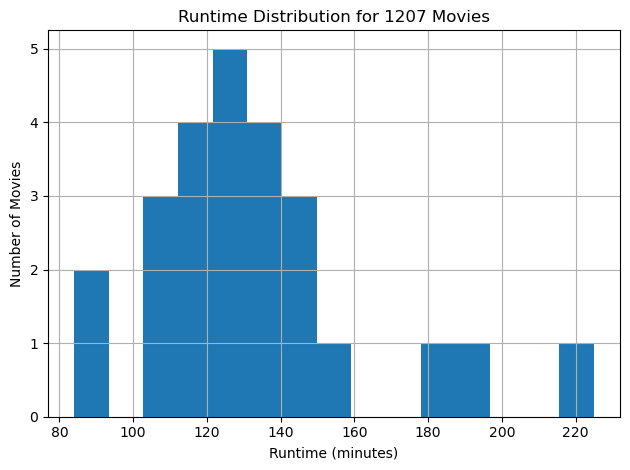

In [133]:
plt.hist(longest_movies["runtime"], bins=15)
plt.title(f"Runtime Distribution for {max_genre} Movies")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.tight_layout()
plt.show()